In [224]:
from StepperController import StepperController
import cv2 as cv
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

### PLACE THE SAUSAGE IN INITIAL POSITION
**Flat part of the ring to the top**

In [225]:
DATA_PATH = "data"
ROTATION_COUNT = 5
DEGREE_PER_IMAGE = 1
IMAGE_SIZE = 640
SAUSAGE_RATIO = 50/12
YOLO_CONFIDENCE = 0.5

In [226]:
controller = StepperController('/dev/tty.usbserial-2130')
yolo_model = YOLO('../weights/yolo11n_trained.pt')
cap = cv.VideoCapture(0)

Connected to Arduino on /dev/tty.usbserial-2130


In [227]:
def process_frame(frame, yolo_model):
    w, h = frame.shape[1], frame.shape[0]
    image = frame[h//2 - IMAGE_SIZE//2:h//2 + IMAGE_SIZE//2, w//2 - IMAGE_SIZE//2:w//2 + IMAGE_SIZE//2]
    results = yolo_model(image, verbose=False)
    detections = results[0]  # Extract detections

    if len(detections) == 0:
        return None
    
    det = detections[0]

    max_conf = 0
    for i in range(len(det.boxes)):
        conf = det.boxes.conf[i].item()
        if conf > max_conf:
            max_conf = conf
            det = detections[i]

    if max_conf < YOLO_CONFIDENCE:  # Confidence threshold
        return None
    
    x1, y1, x2, y2 = det.boxes.xyxy[0].tolist()
    conf = det.boxes.conf[0].item()
    
    # Crop the detected region
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cropped = image[y1:y2, x1:x2]

    return cropped

### Test frame reading to set up bounding boxes

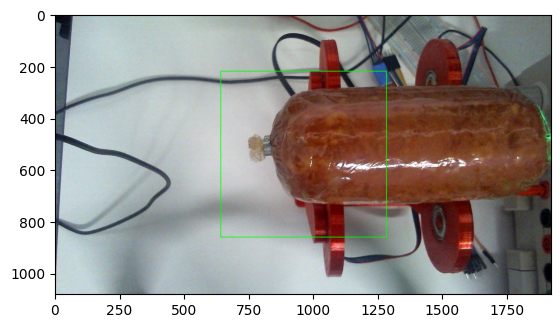

In [228]:
ret, frame = cap.read()
if not ret:
    print("Error: Could not read frame from webcam.")
w, h = frame.shape[1], frame.shape[0]
image = cv.rectangle(frame, (w//2 - IMAGE_SIZE//2, h//2 - IMAGE_SIZE//2), (w//2 + IMAGE_SIZE//2, h//2 + IMAGE_SIZE//2), (0, 255, 0), 2)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

### Test ring detection

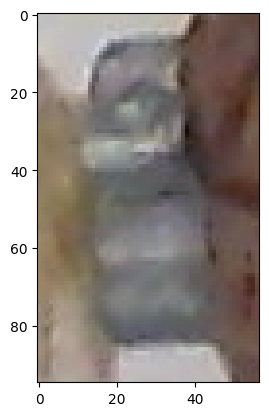

In [229]:
ret, frame = cap.read()
if not ret:
    print("Error: Could not read frame from webcam.")
image = process_frame(frame, yolo_model)
if image is None:
    print("No detection found.")
else:
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [ ]:
os.makedirs(DATA_PATH, exist_ok=True)
pbar = tqdm(total=ROTATION_COUNT * (360 // DEGREE_PER_IMAGE), desc="Total Progress")
for rot in tqdm(range(ROTATION_COUNT), desc="Loop"):
    for d in tqdm(range(0, 360, DEGREE_PER_IMAGE), desc="Degrees", leave=False):
        pbar.update(1)
        degrees = (360*rot + d) * SAUSAGE_RATIO
        controller.rotate_to_angle(degrees, verbose=False)
        ret, frame = cap.read()
        image = process_frame(frame, yolo_model)
        if image is None:
            print("No detection found.")
            continue

        save_path = os.path.join(DATA_PATH, f"{d}")
        os.makedirs(save_path, exist_ok=True)
        cv.imwrite(os.path.join(save_path, f"image_{rot}_{d}.jpg"), image)
pbar.close()

Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Rotation completed at 0.0 degrees
Rotation completed at 4.17 degrees


Rotation completed at 8.33 degrees
Rotation completed at 12.5 degrees


Rotation completed at 16.67 degrees
Rotation completed at 20.83 degrees


Rotation completed at 25.0 degrees
Rotation completed at 29.17 degrees


Rotation completed at 33.33 degrees
Rotation completed at 37.5 degrees


Rotation completed at 41.67 degrees
Rotation completed at 45.83 degrees


Rotation completed at 50.0 degrees
Rotation completed at 54.17 degrees


Rotation completed at 58.33 degrees
Rotation completed at 62.5 degrees


Rotation completed at 66.67 degrees
Rotation completed at 70.83 degrees


Rotation completed at 75.0 degrees
Rotation completed at 79.17 degrees


Rotation completed at 83.33 degrees
Rotation completed at 87.5 degrees


Rotation completed at 91.67 degrees
Rotation completed at 95.83 degrees


Rotation completed at 100.0 degrees
Rotation completed at 104.17 degrees


Rotation completed at 108.33 degrees
Rotation completed at 112.5 degrees


Rotation completed at 116.67 degrees
Rotation completed at 120.83 degrees


Rotation completed at 125.0 degrees
Rotation completed at 129.17 degrees


Rotation completed at 133.33 degrees
Rotation completed at 137.5 degrees


Rotation completed at 141.67 degrees
Rotation completed at 145.83 degrees


Rotation completed at 150.0 degrees
Rotation completed at 154.17 degrees


Rotation completed at 158.33 degrees
Rotation completed at 162.5 degrees


Rotation completed at 166.67 degrees
Rotation completed at 170.83 degrees


Rotation completed at 175.0 degrees
Rotation completed at 179.17 degrees


Rotation completed at 183.33 degrees


Rotation completed at 187.5 degrees
Rotation completed at 191.67 degrees


Rotation completed at 195.83 degrees
Rotation completed at 200.0 degrees


Rotation completed at 204.17 degrees


Rotation completed at 208.33 degrees


Rotation completed at 212.5 degrees
Rotation completed at 216.67 degrees


Rotation completed at 220.83 degrees


Rotation completed at 225.0 degrees


Rotation completed at 229.17 degrees
Rotation completed at 233.33 degrees


Rotation completed at 237.5 degrees
Rotation completed at 241.67 degrees


Rotation completed at 245.83 degrees


Rotation completed at 250.0 degrees
Rotation completed at 254.17 degrees


Rotation completed at 258.33 degrees
Rotation completed at 262.5 degrees


Rotation completed at 266.67 degrees
Rotation completed at 270.83 degrees


Rotation completed at 275.0 degrees
Rotation completed at 279.17 degrees


Rotation completed at 283.33 degrees
Rotation completed at 287.5 degrees


Rotation completed at 291.67 degrees
Rotation completed at 295.83 degrees


Rotation completed at 300.0 degrees
Rotation completed at 304.17 degrees


Rotation completed at 308.33 degrees
Rotation completed at 312.5 degrees


Rotation completed at 316.67 degrees
Rotation completed at 320.83 degrees


Rotation completed at 325.0 degrees
Rotation completed at 329.17 degrees


Rotation completed at 333.33 degrees
Rotation completed at 337.5 degrees


Rotation completed at 341.67 degrees
Rotation completed at 345.83 degrees


Rotation completed at 350.0 degrees
Rotation completed at 354.17 degrees


Rotation completed at 358.33 degrees
Rotation completed at 362.5 degrees


Rotation completed at 366.67 degrees


Rotation completed at 370.83 degrees
Rotation completed at 375.0 degrees


Rotation completed at 379.17 degrees


Rotation completed at 383.33 degrees
Rotation completed at 387.5 degrees


Rotation completed at 391.67 degrees


Rotation completed at 395.83 degrees


Rotation completed at 400.0 degrees
Rotation completed at 404.17 degrees


Rotation completed at 408.33 degrees


Rotation completed at 412.5 degrees
Rotation completed at 416.67 degrees


Rotation completed at 420.83 degrees


Rotation completed at 425.0 degrees
Rotation completed at 429.17 degrees


Rotation completed at 433.33 degrees


Rotation completed at 437.5 degrees
Rotation completed at 441.67 degrees


Rotation completed at 445.83 degrees


Rotation completed at 450.0 degrees
Rotation completed at 454.17 degrees


Rotation completed at 458.33 degrees


Rotation completed at 462.5 degrees
Rotation completed at 466.67 degrees


Rotation completed at 470.83 degrees


Rotation completed at 475.0 degrees
Rotation completed at 479.17 degrees


Rotation completed at 483.33 degrees


Rotation completed at 487.5 degrees
Rotation completed at 491.67 degrees


Rotation completed at 495.83 degrees


Rotation completed at 500.0 degrees
Rotation completed at 504.17 degrees


Rotation completed at 508.33 degrees


Rotation completed at 512.5 degrees
Rotation completed at 516.67 degrees


Rotation completed at 520.83 degrees


Rotation completed at 525.0 degrees
Rotation completed at 529.17 degrees


Rotation completed at 533.33 degrees


Rotation completed at 537.5 degrees
Rotation completed at 541.67 degrees


Rotation completed at 545.83 degrees


Rotation completed at 550.0 degrees
Rotation completed at 554.17 degrees


Rotation completed at 558.33 degrees


Rotation completed at 562.5 degrees
Rotation completed at 566.67 degrees


Rotation completed at 570.83 degrees


Rotation completed at 575.0 degrees
Rotation completed at 579.17 degrees


Rotation completed at 583.33 degrees


Rotation completed at 587.5 degrees
Rotation completed at 591.67 degrees


Rotation completed at 595.83 degrees


Rotation completed at 600.0 degrees
Rotation completed at 604.17 degrees


Rotation completed at 608.33 degrees


Rotation completed at 612.5 degrees
Rotation completed at 616.67 degrees


Rotation completed at 620.83 degrees


Rotation completed at 625.0 degrees
Rotation completed at 629.17 degrees


Rotation completed at 633.33 degrees


Rotation completed at 637.5 degrees
Rotation completed at 641.67 degrees


Rotation completed at 645.83 degrees


Rotation completed at 650.0 degrees
Rotation completed at 654.17 degrees


Rotation completed at 658.33 degrees


Rotation completed at 662.5 degrees
Rotation completed at 666.67 degrees


Rotation completed at 670.83 degrees


Rotation completed at 675.0 degrees
Rotation completed at 679.17 degrees


Rotation completed at 683.33 degrees


Rotation completed at 687.5 degrees
Rotation completed at 691.67 degrees


Rotation completed at 695.83 degrees


Rotation completed at 700.0 degrees
Rotation completed at 704.17 degrees


Rotation completed at 708.33 degrees


Rotation completed at 712.5 degrees
Rotation completed at 716.67 degrees


Rotation completed at 720.83 degrees


Rotation completed at 725.0 degrees
Rotation completed at 729.17 degrees


Rotation completed at 733.33 degrees


Rotation completed at 737.5 degrees
Rotation completed at 741.67 degrees


Rotation completed at 745.83 degrees


Rotation completed at 750.0 degrees
Rotation completed at 754.17 degrees


Rotation completed at 758.33 degrees


Rotation completed at 762.5 degrees
Rotation completed at 766.67 degrees


Rotation completed at 770.83 degrees


Rotation completed at 775.0 degrees
Rotation completed at 779.17 degrees


Rotation completed at 783.33 degrees


Rotation completed at 787.5 degrees


Rotation completed at 791.67 degrees


Rotation completed at 795.83 degrees


Rotation completed at 800.0 degrees


Rotation completed at 804.17 degrees


Rotation completed at 808.33 degrees
Rotation completed at 812.5 degrees


Rotation completed at 816.67 degrees


Rotation completed at 820.83 degrees
Rotation completed at 825.0 degrees


Rotation completed at 829.17 degrees


Rotation completed at 833.33 degrees
Rotation completed at 837.5 degrees


Rotation completed at 841.67 degrees


Rotation completed at 845.83 degrees
Rotation completed at 850.0 degrees


Rotation completed at 854.17 degrees


Rotation completed at 858.33 degrees
Rotation completed at 862.5 degrees


Rotation completed at 866.67 degrees


Rotation completed at 870.83 degrees


Rotation completed at 875.0 degrees
Rotation completed at 879.17 degrees


Rotation completed at 883.33 degrees


Rotation completed at 887.5 degrees


Rotation completed at 891.67 degrees


Rotation completed at 895.83 degrees


Rotation completed at 900.0 degrees


Rotation completed at 904.17 degrees


Rotation completed at 908.33 degrees


Rotation completed at 912.5 degrees


Rotation completed at 916.67 degrees


Rotation completed at 920.83 degrees


Rotation completed at 925.0 degrees


Rotation completed at 929.17 degrees


Rotation completed at 933.33 degrees


Rotation completed at 937.5 degrees
Rotation completed at 941.67 degrees


Rotation completed at 945.83 degrees


Rotation completed at 950.0 degrees


Rotation completed at 954.17 degrees


Rotation completed at 958.33 degrees
Rotation completed at 962.5 degrees


Rotation completed at 966.67 degrees


Rotation completed at 970.83 degrees


Rotation completed at 975.0 degrees
Rotation completed at 979.17 degrees


Rotation completed at 983.33 degrees


Rotation completed at 987.5 degrees


Rotation completed at 991.67 degrees


Rotation completed at 995.83 degrees
Rotation completed at 1000.0 degrees


Rotation completed at 1004.17 degrees


Rotation completed at 1008.33 degrees


Rotation completed at 1012.5 degrees


Rotation completed at 1016.67 degrees


Rotation completed at 1020.83 degrees


Rotation completed at 1025.0 degrees


Rotation completed at 1029.17 degrees


Loop:   0%|          | 0/5 [00:48<?, ?it/s]

Rotation completed at 1033.33 degrees


KeyboardInterrupt: 